<a href="https://colab.research.google.com/github/wnich/datarockie_datasci_bootcamp_06/blob/main/python/machine_learning/Predict_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import tensorflow as tf

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')


from scipy import stats


In [48]:
# read data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [51]:
#EDA
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

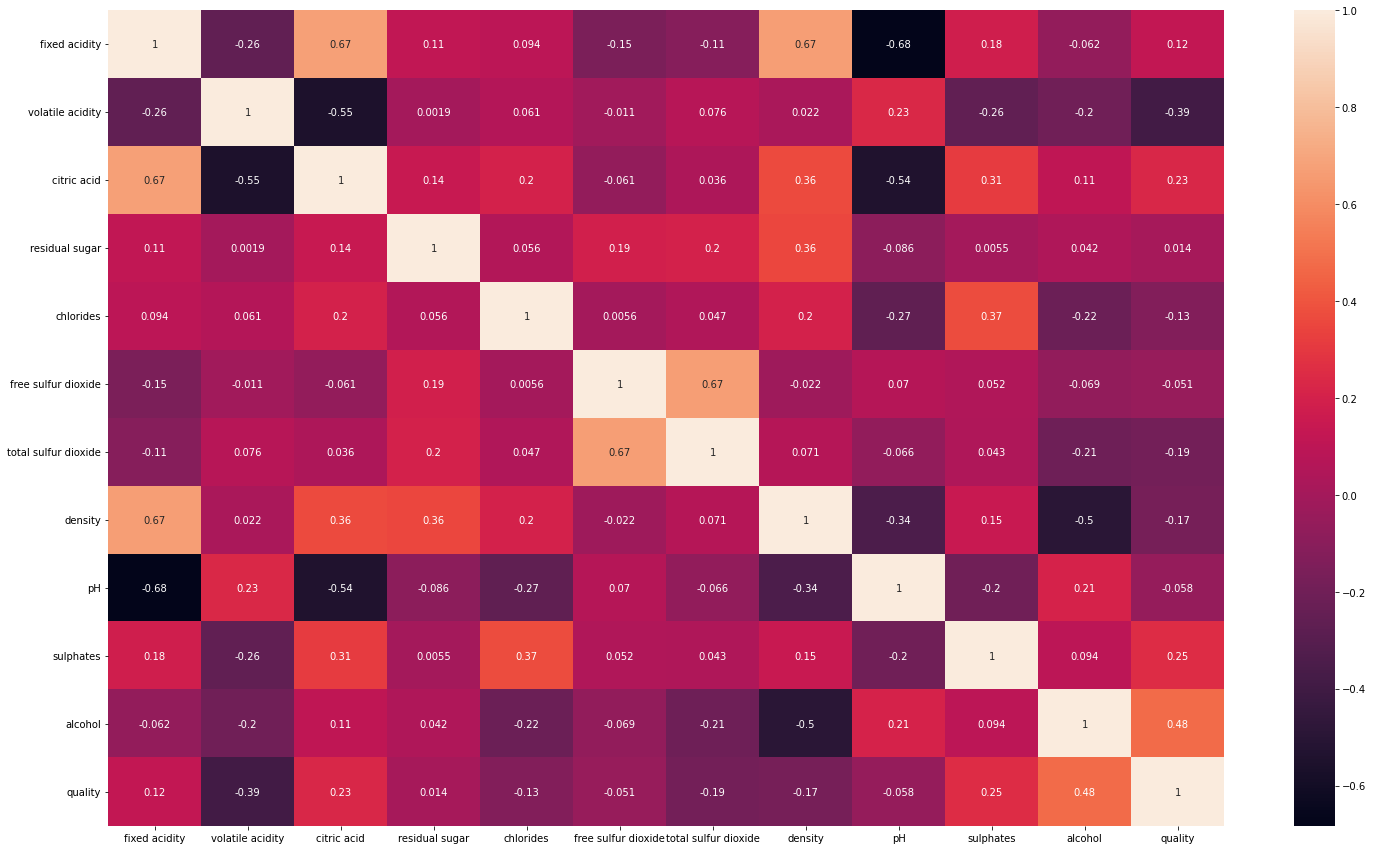

In [52]:
#visualize the correlation of the data to find 
#if there is any redundant features, so we can drop
plt.figure(figsize = (25,15))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show() #no header

In [53]:
#is there any outlier?
#using z-score ....scipy.stats.zscore(arr, axis=0, ddof=0)
#for Pandas DF: df.apply(stats.zscore)

z = np.abs(stats.zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [54]:
# z >3 => outlier
#remove and keep only ones with z < 3
df_new = df[(z<3).all(axis=1)]

In [55]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
df_new.shape

(1451, 12)

In [57]:
#splitting the data for training and testing 
X = df_new.drop(columns = 'quality')
y = df_new['quality']

#4 sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42 #same as set.seed()....... 75%
)


In [58]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1088, 11) (363, 11) (1088,) (363,)


In [59]:
#scaling the values of features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
#modeling
models = {} #empty dictionary ..[]--list indices must be integers not str, () tuple no
# Logistic Regression
lr = LogisticRegression()
models["Logistic Regression"] = lr
# KNN
knn = KNeighborsClassifier()
models["K Neighbors Classifier"] = knn
# SVC
svc = SVC(kernel="rbf")
models["Support Vector Classifier"] = svc
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
models["Decision Tree Classifier"] = dtc
rf = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)
models["Random Forest"] = rf


#or
# models = [LogisticRegression(), KNeighborsClassifier(), SVC(kernel='rbf'), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)]
#or
# models = [lr, knn, svc]


In [61]:
models

{'Logistic Regression': LogisticRegression(),
 'K Neighbors Classifier': KNeighborsClassifier(),
 'Support Vector Classifier': SVC(),
 'Decision Tree Classifier': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)}

In [70]:
#or range(#ofmodels)
for each_model in models: 
    models[each_model].fit(X_train,y_train)


In [93]:
def model_pred_eva(model_name, model, X_test, y_test):
  print('Model:', model_name)
  y_pred = model.predict(X_test)
  print('Prediction using', model_name) #, ":", y_pred)
  acu = accuracy_score(y_test,y_pred) #actual output and predicted output
  print('Accuracy score:',acu)
  cm = confusion_matrix(y_test,y_pred)
  print("Confusion Matrix:\n",cm)
  cmd = ConfusionMatrixDisplay(cm)
  fig, ax = plt.subplots(figsize=(10,10))
  cmd.plot(ax=ax)
  #Classification report for the validation data--precision, recall, f1
  print('Classification Report:\n', metrics.classification_report(y_test,y_pred)) 
  plt.show()



Model: Logistic Regression
Prediction using Logistic Regression
Accuracy score: 0.581267217630854
Confusion Matrix:
 [[ 0  9  4  1  0]
 [ 0 99 44  1  0]
 [ 0 46 94 10  0]
 [ 0  5 27 18  0]
 [ 0  0  3  2  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.62      0.69      0.65       144
           6       0.55      0.63      0.58       150
           7       0.56      0.36      0.44        50
           8       0.00      0.00      0.00         5

    accuracy                           0.58       363
   macro avg       0.35      0.33      0.34       363
weighted avg       0.55      0.58      0.56       363



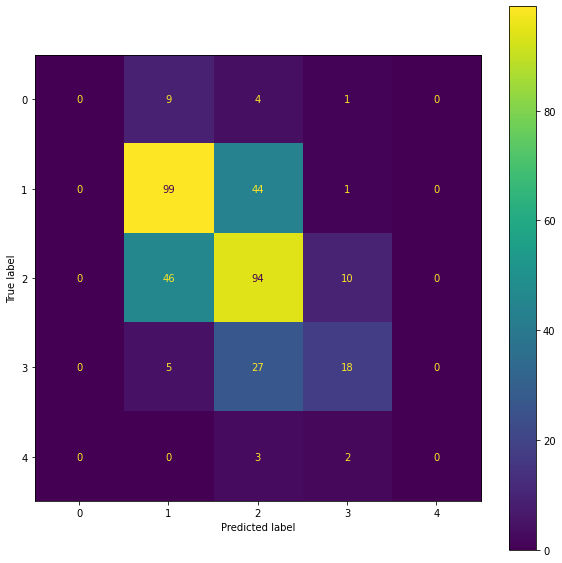

Model: K Neighbors Classifier
Prediction using K Neighbors Classifier
Accuracy score: 0.5482093663911846
Confusion Matrix:
 [[ 0  8  6  0  0]
 [ 0 89 52  3  0]
 [ 0 44 92 13  1]
 [ 0 10 22 18  0]
 [ 0  0  2  3  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.59      0.62      0.60       144
           6       0.53      0.61      0.57       150
           7       0.49      0.36      0.41        50
           8       0.00      0.00      0.00         5

    accuracy                           0.55       363
   macro avg       0.32      0.32      0.32       363
weighted avg       0.52      0.55      0.53       363



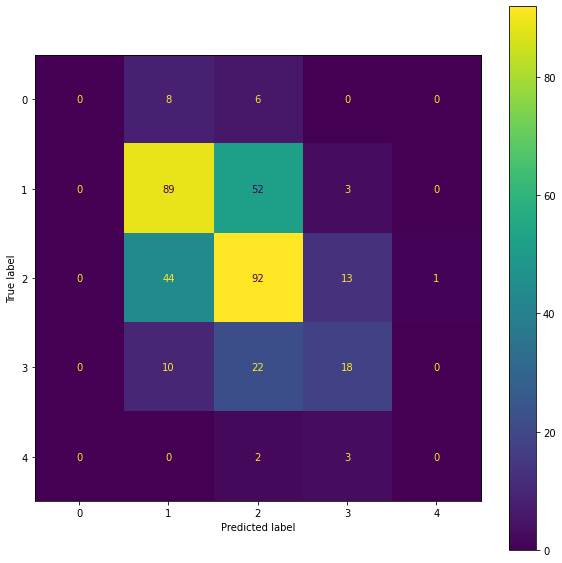

Model: Support Vector Classifier
Prediction using Support Vector Classifier
Accuracy score: 0.6005509641873278
Confusion Matrix:
 [[  0  10   3   1   0]
 [  0 103  40   1   0]
 [  0  49  95   6   0]
 [  0   4  26  20   0]
 [  0   0   2   3   0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.62      0.72      0.66       144
           6       0.57      0.63      0.60       150
           7       0.65      0.40      0.49        50
           8       0.00      0.00      0.00         5

    accuracy                           0.60       363
   macro avg       0.37      0.35      0.35       363
weighted avg       0.57      0.60      0.58       363



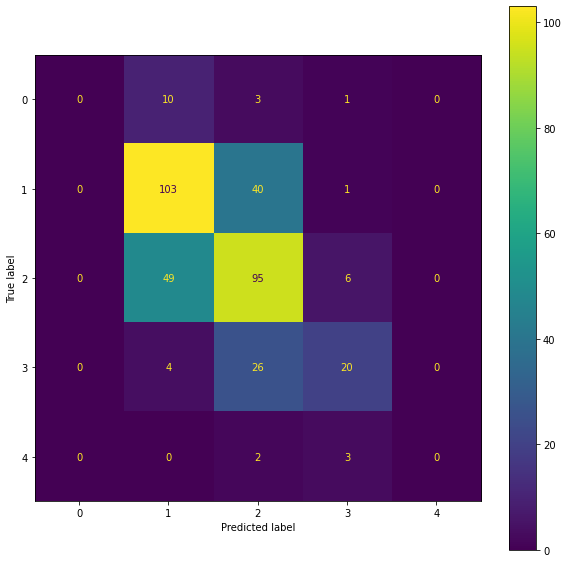

Model: Decision Tree Classifier
Prediction using Decision Tree Classifier
Accuracy score: 0.5537190082644629
Confusion Matrix:
 [[ 0  7  5  2  0]
 [ 2 81 51 10  0]
 [ 4 39 92 13  2]
 [ 1  7 13 28  1]
 [ 0  0  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.60      0.56      0.58       144
           6       0.57      0.61      0.59       150
           7       0.49      0.56      0.52        50
           8       0.00      0.00      0.00         5

    accuracy                           0.55       363
   macro avg       0.33      0.35      0.34       363
weighted avg       0.54      0.55      0.55       363



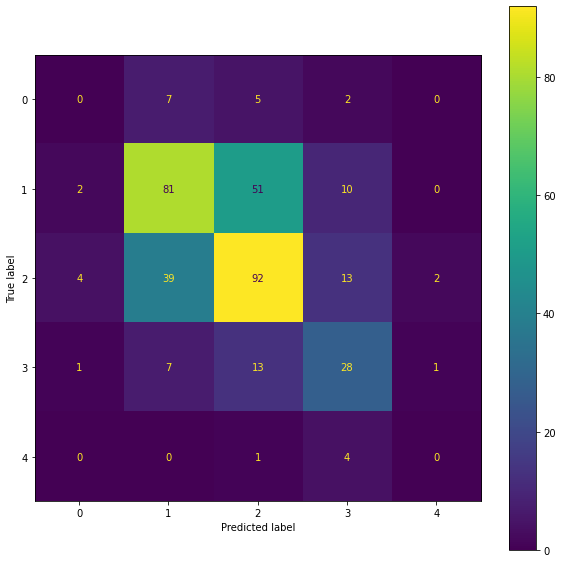

Model: Random Forest
Prediction using Random Forest
Accuracy score: 0.6115702479338843
Confusion Matrix:
 [[  0  11   2   1   0]
 [  1 100  41   2   0]
 [  0  39  97  14   0]
 [  1   8  16  25   0]
 [  0   0   2   3   0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.63      0.69      0.66       144
           6       0.61      0.65      0.63       150
           7       0.56      0.50      0.53        50
           8       0.00      0.00      0.00         5

    accuracy                           0.61       363
   macro avg       0.36      0.37      0.36       363
weighted avg       0.58      0.61      0.60       363



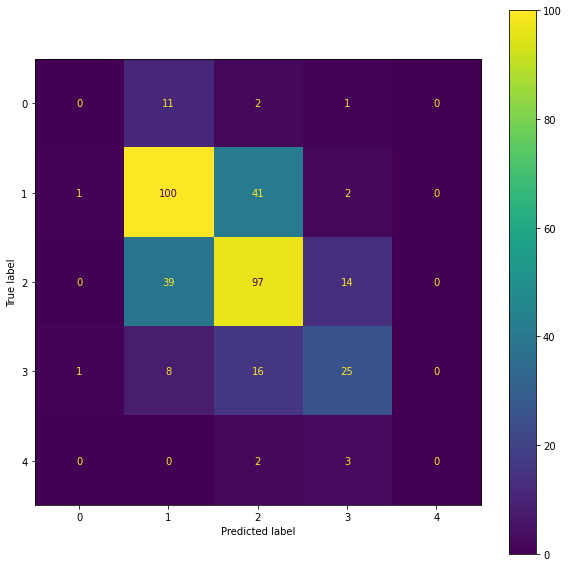

In [94]:
for each_model in models:
    model_pred_eva(each_model,models[each_model],X_test,y_test)

In [ ]:
% quality #5 is the best!